# Convolution of an Image

# Assignment 02 CS891
# Muhammad Farooq
# 182-FBAS/PhDCS/F21


In [11]:
import cv2
import numpy as np
#Difference between correlation and convolution

def conv_transform(image):
    image_copy = image.copy()
    for i in range(image.shap[0]):
        for j in range(image.shap[1]):
            image_copy[i][j] = image[image.shape[0]-i-1][image.shape[1]-j-1]
            return image_copy
def conv(image, kernel):
    kernel = conv_transform(kernel)
    image_h = image.shape[0]
    Image_w = image.shape[1]
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    H = kernel_h
    W = kernel_w
    Image_conv = np.zeros(image.shape)

    for I in range (h, image_h-h):
       for j in range(w, image_w-w):
            sum = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum = sum + kernel[m][n]+image[i-h-m][j-w-n]
            image_conv[i][j] = sum
    return image_conv	




In [12]:
import cv2 
import numpy as np
#Processing the image into Grayscale

"""
For a gray scale (n x n) image and (f x f) filter/kernel, the dimensions of the image resulting from a convolution
operation is (n – f + 1) x (n – f + 1).An (8 x 8) image and (3 x 3) filter, the output resulting after convolution
operation would be of size (6 x 6). Thus, the image shrinks every time a convolution operation is performed.
This places an upper limit to the number of times such an operation could be performed before the image reduces
to nothing thereby precluding us from building deeper networks.
"""
def processImage(image): 
    image = cv2.imread(image) 
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
    return image
            
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output
    
    

In [13]:
if __name__ == '__main__':
    # Grayscale Image
    image = processImage('Nadeem.jpeg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('nad.jpeg', output)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 70. ... 80.  0.  0.]
 ...
 [ 0.  0. 10. ... 65.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
import cv2
 
img = cv2.imread('nad.jpeg',0)
print(img)

In [ ]:
 print(imagePadded)

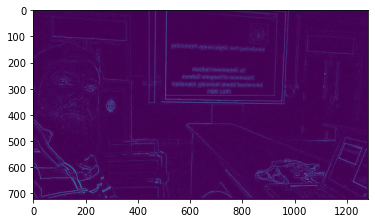

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('nad.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
from PIL import Image

image = Image.open('nad.jpeg')
image.show()

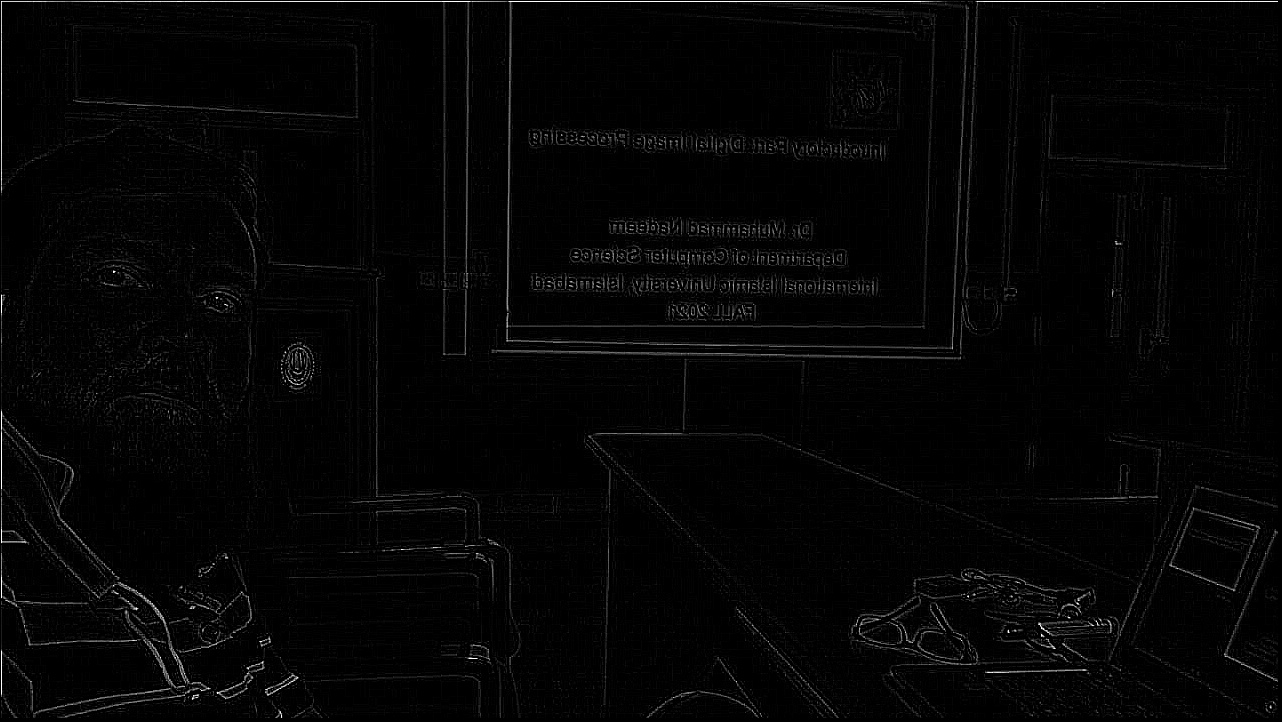

In [18]:
import IPython.display as display
from PIL import Image
display.display(Image.open("nad.jpeg"))

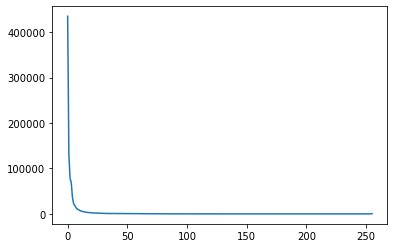

In [19]:
import cv2
  
# importing library for plotting
from matplotlib import pyplot as plt
  
# reads an input image
img = cv2.imread('nad.jpeg',0)
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()